In [18]:
from Preprocess.data_cleaning import LowerCase, RemoveURL, RemoveEmojis, RemovePunctuations, RemoveStopWords
from model.ml_model import MLModel

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from transformers import BertTokenizer

import pandas as pd

In [17]:
pd.set_option("future.no_silent_downcasting", True)

In [3]:
data: pd.DataFrame = pd.read_csv("Data/bbc_data.csv")
data.head(2)

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment


In [4]:
data_cleaning_pipe: Pipeline = Pipeline(
    steps=[
        ("lowe_case", LowerCase()),
        ("remove_url", RemoveURL()),
        ("remove_emojis", RemoveEmojis()),
        ("remove_punchuarions", RemovePunctuations()),
        ("remove_stop_words", RemoveStopWords()),
    ]
)

data["cleaned_text"] = data_cleaning_pipe.fit_transform(data["data"], data["labels"])
data["labels"].unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

In [5]:
"""
Encode class label to numberic values.
"""

label_dictionary = {"entertainment": 0, "business": 1, "sport": 2, "politics": 3, "tech": 4}
data["labels"] = data["labels"].replace(label_dictionary)
data["labels"].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [6]:
"""
Select "cleaned_text" from preprocessing level as features and "labels" as labels.
"""

features = list(data["cleaned_text"])
labels = list(data["labels"])

In [7]:
"""
Train & Test split on 80% & 20% ratio.
"""

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2)

"""
Text vectorization using TF-IDF
"""

tf_idf_vector = TfidfVectorizer(min_df=1, lowercase=True)

### Tf-Idf Vectorizer

In [8]:
"""
Random forest classifier with 100 as the estimator count selected as the base non-deep learning model. TF-IDX vectorization
used as the tokenization method.
"""

rf_clf = RandomForestClassifier(n_estimators=100)
rf = MLModel(rf_clf, tf_idf_vector, X_train, X_test, Y_train, Y_test, label_dictionary)
rf.classification_report_print()

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        87
           1       0.96      0.98      0.97       101
           2       0.96      1.00      0.98       103
           3       0.98      0.96      0.97        82
           4       0.97      0.96      0.97        72

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



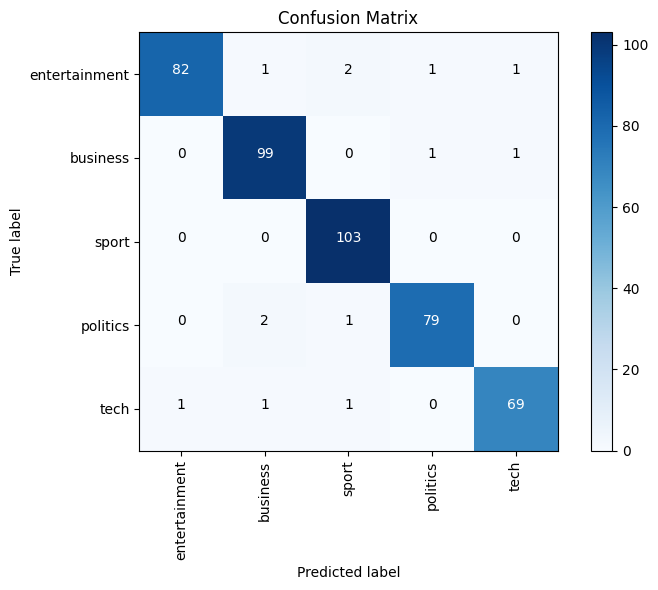

In [9]:
"""
Confusion matrix for Random forest classifier is as follow.
"""

rf.confusion_matrix_plot()

### Whitespace Tokenizer

In [11]:
"""
Use Whitespace Tokenizer to word vectorizing. Then apply tokenizer to Random Forest classifier model.
"""


def whitespace_tokenizer(text):
    return text.split()


whitespace_vectorizer = CountVectorizer(tokenizer=whitespace_tokenizer, preprocessor=None, lowercase=True, token_pattern=None)

rf_white_space = MLModel(rf_clf, whitespace_vectorizer, X_train, X_test, Y_train, Y_test, label_dictionary)
rf_white_space.classification_report_print()

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        87
           1       0.94      0.97      0.96       101
           2       0.98      0.99      0.99       103
           3       0.95      0.94      0.94        82
           4       0.97      0.97      0.97        72

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



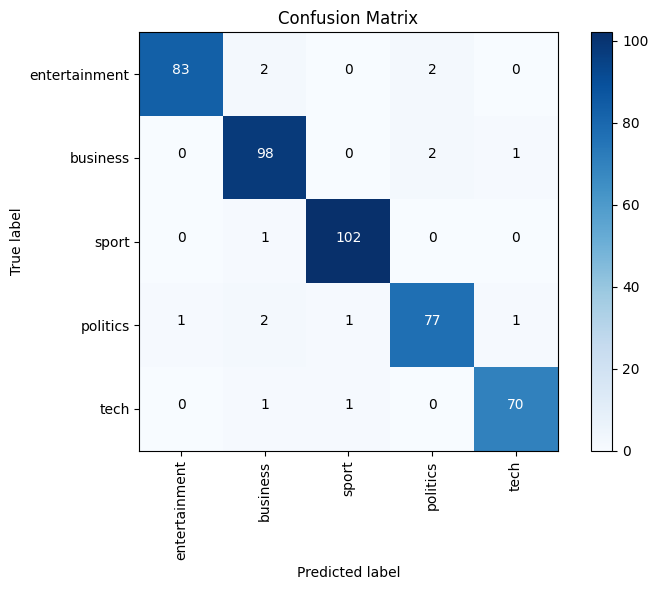

In [12]:
rf_white_space.confusion_matrix_plot()

### Lemmatizing

In [14]:
lemmatizer = WordNetLemmatizer()


def lemmatize_tokenizer(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words


lemmatizing_vectorizer = CountVectorizer(tokenizer=lemmatize_tokenizer, token_pattern=None, preprocessor=None, lowercase=True)

fr_lemma = MLModel(rf_clf, lemmatizing_vectorizer, X_train, X_test, Y_train, Y_test, label_dictionary)
fr_lemma.classification_report_print()

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        87
           1       0.96      0.97      0.97       101
           2       0.97      0.99      0.98       103
           3       0.96      0.98      0.97        82
           4       0.97      0.96      0.97        72

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



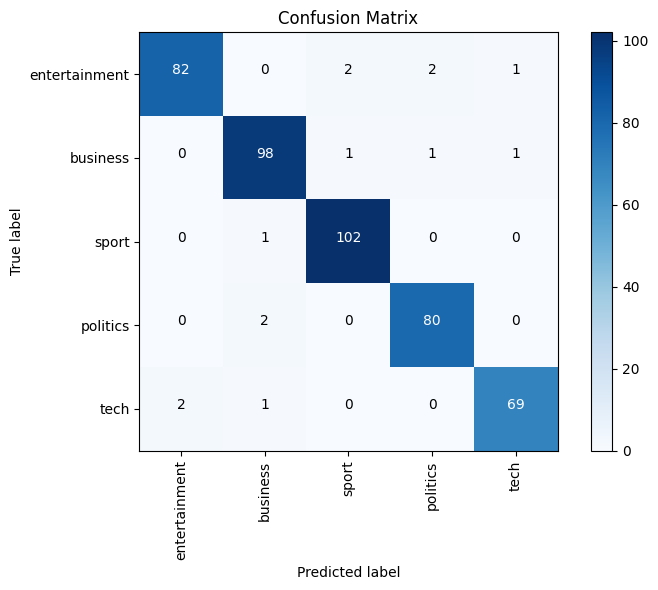

In [15]:
fr_lemma.confusion_matrix_plot()

### Wordpiece Vectorizer

In [19]:
wordpiece_ = BertTokenizer.from_pretrained("bert-base-uncased")


def wordpiece_tokenizer(text):
    tokens = wordpiece_.tokenize(text)
    return tokens


wordpiece_vectorizer = CountVectorizer(tokenizer=wordpiece_tokenizer, token_pattern=None, lowercase=False)

rf_wordpiece = MLModel(rf_clf, wordpiece_vectorizer, X_train, X_test, Y_train, Y_test, label_dictionary)
rf_wordpiece.classification_report_print()

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        87
           1       0.93      0.99      0.96       101
           2       0.96      0.99      0.98       103
           3       0.99      0.90      0.94        82
           4       0.97      0.96      0.97        72

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

